#Mining the Social Web, 2nd Edition

##Chapter 2: Mining Facebook: Analyzing Fan Pages, Examining Friendships, and More

This IPython Notebook provides an interactive way to follow along with and explore the numbered examples from [_Mining the Social Web (2nd Edition)_](http://bit.ly/135dHfs). The intent behind this notebook is to reinforce the concepts from the sample code in a fun, convenient, and effective way. This notebook assumes that you are reading along with the book and have the context of the discussion as you work through these exercises.

In the somewhat unlikely event that you've somehow stumbled across this notebook outside of its context on GitHub, [you can find the full source code repository here](http://bit.ly/16kGNyb).

## Copyright and Licensing

You are free to use or adapt this notebook for any purpose you'd like. However, please respect the [Simplified BSD License](https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition/blob/master/LICENSE.txt) that governs its use.

# Facebook API Access

Facebook implements OAuth 2.0 as its standard authentication mechanism, but provides a convenient way for you to get an _access token_ for development purposes, and we'll opt to take advantage of that convenience in this notebook. For details on implementing an OAuth flow with Facebook (all from within IPython Notebook), see the \_AppendixB notebook from the [IPython Notebook Dashboard](/).

For this first example, login to your Facebook account and go to https://developers.facebook.com/tools/explorer/ to obtain and set permissions for an access token that you will need to define in the code cell defining the ACCESS_TOKEN variable below.  

Be sure to explore the permissions that are available by clicking on the "Get Access Token" button that's on the page and exploring all of the tabs available. For example, you will need to set the "friends_likes" option under the "Friends Data Permissions" since this permission is used by the script below but is not a basic permission and is not enabled by default. 

<img src="files/resources/ch02-facebook/images/FB_GraphExplorer_perms.png" width="300px" /><br />

In [1]:
# Copy and paste in the value you just got from the inline frame into this variable and execute this cell.
# Keep in mind that you could have just gone to https://developers.facebook.com/tools/access_token/
# and retrieved the "User Token" value from the Access Token Tool

ACCESS_TOKEN = 'EAACEdEose0cBAC3znHI5uMVUZClSI8wGnKoCAXZCsYbcf8Bfs4ZB4PgvlWtnP4waygrLkANczSlSNuZCXHjiEJYs6AOKFNSiFGRluKR0KaITsLyZBNMsYzi5Jfjk5uNb7ipCW4ZBs9n630fKaqOlJNTCzNNX3LeiBPNl1PYeZCNcQZDZD'

## Example 1. Making Graph API requests over HTTP

In [17]:
import requests # pip install requests
import json
import matplotlib.pyplot as plt

base_url = 'https://graph.facebook.com/me'

# Get 10 likes for 10 friends
fields = 'id,name,friends.limit(10).fields(likes.limit(10))'

url = '%s?fields=%s&access_token=%s' % \
    (base_url, fields, ACCESS_TOKEN,)

# This API is HTTP-based and could be requested in the browser,
# with a command line utlity like curl, or using just about
# any programming language by making a request to the URL.
# Click the hyperlink that appears in your notebook output
# when you execute this code cell to see for yourself...
print(url)

# Interpret the response as JSON and convert back
# to Python data structures
content = requests.get(url).json()

# Pretty-print the JSON and display it
print(json.dumps(content, indent=1))
%matplotlib inline

https://graph.facebook.com/me?fields=id,name,friends.limit(10).fields(likes.limit(10))&access_token=EAACEdEose0cBAC3znHI5uMVUZClSI8wGnKoCAXZCsYbcf8Bfs4ZB4PgvlWtnP4waygrLkANczSlSNuZCXHjiEJYs6AOKFNSiFGRluKR0KaITsLyZBNMsYzi5Jfjk5uNb7ipCW4ZBs9n630fKaqOlJNTCzNNX3LeiBPNl1PYeZCNcQZDZD
{
 "friends": {
  "summary": {
   "total_count": 179
  },
  "data": [
   {
    "id": "559540587"
   },
   {
    "likes": {
     "data": [
      {
       "category": "Community",
       "id": "326614387531342",
       "created_time": "2016-07-29T05:32:27+0000",
       "name": "Blue Lives Matter"
      },
      {
       "category": "TV Show",
       "id": "1131411890224100",
       "created_time": "2016-07-29T05:32:23+0000",
       "name": "Badge Cams"
      },
      {
       "category": "Shopping/Retail",
       "created_time": "2016-07-22T04:34:56+0000",
       "id": "837834666346521",
       "category_list": [
        {
         "id": "186230924744328",
         "name": "Clothing Store"
        }
       ],
    

Note: If you attempt to run a query for all of your friends' likes and it appears to hang, it is probably because you have a lot of friends who have a lot of likes. If this happens, you may need to add limits and offsets to the fields in the query as described in Facebook's [field expansion](https://developers.facebook.com/docs/reference/api/field_expansion/) documentation. However, the <code>facebook</code> library that we'll use in the next example handles some of these issues, so it's recommended that you hold off and try it out first. This initial example is just to illustrate that Facebook's API is built on top of HTTP.

A couple of field limit/offset examples that illustrate the possibilities follow:

<code>
fields = 'id,name,friends.limit(10).fields(likes)'            # Get all likes for 10 friends 
fields = 'id,name,friends.offset(10).limit(10).fields(likes)' # Get all likes for 10 more friends 
fields = 'id,name,friends.fields(likes.limit(10))'            # Get 10 likes for all friends 
fields = 'id,name,friends.fields(likes.limit(10))'            # Get 10 likes for all friends
</code>

## Example 2. Querying the Graph API with Python

In [18]:
import facebook # pip install facebook-sdk
import json

# A helper function to pretty-print Python objects as JSON

def pp(o): 
    print(json.dumps(o, indent=1))

# Create a connection to the Graph API with your access token

g = facebook.GraphAPI(ACCESS_TOKEN)

# Execute a few sample queries

print('---------------')
print('Me')
print('---------------')
pp(g.get_object('me'))
print()
print('---------------')
print('My Friends')
print('---------------')
pp(g.get_connections('me', 'friends'))
print()
print('---------------')
print('Social Web')
print('---------------')
pp(g.request("search", {'q' : 'social web', 'type' : 'page'}))

---------------
Me
---------------
{
 "political": "Kill 'em all, let God sort 'em out",
 "id": "10205911425655585",
 "name": "Michael James Osias",
 "significant_other": {
  "id": "847717688578982",
  "name": "Bobbi Jo Johnson Osias"
 },
 "education": [
  {
   "type": "High School",
   "school": {
    "id": "110587165636542",
    "name": "North Dakota"
   },
   "id": "10200854993527942",
   "year": {
    "id": "114406695263512",
    "name": "1951"
   }
  },
  {
   "concentration": [
    {
     "id": "198758573483479",
     "name": "booze"
    }
   ],
   "school": {
    "id": "129214500484927",
    "name": "Taiwan Wine Academy \u53f0\u7063\u9152\u7814\u5b78\u82d1"
   },
   "id": "10200854995247985",
   "year": {
    "id": "115222675160400",
    "name": "1950"
   },
   "type": "College"
  }
 ],
 "timezone": -4,
 "first_name": "Michael",
 "location": {
  "id": "108424279189115",
  "name": "New York, New York"
 },
 "work": [
  {
   "start_date": "1997-12-31",
   "location": {
    "id": "1

## Example 3. Results for a Graph API query for Mining the Social Web

In [19]:
# Get an instance of Mining the Social Web
# Using the page name also works if you know it.
# e.g. 'MiningTheSocialWeb' or 'CrossFit'
mtsw_id = '146803958708175'
pp(g.get_object(mtsw_id))

{
 "were_here_count": 0,
 "id": "146803958708175",
 "parking": {
  "lot": 0,
  "street": 0,
  "valet": 0
 },
 "mission": "Teaches you how to navigate the most popular social web APIs to access, collect, analyze, and visualize social web data with IPython Notebook and other easy to use Python packages and visualization tools.",
 "category": "Book",
 "has_added_app": false,
 "release_date": "January 2011",
 "is_community_page": false,
 "cover": {
  "offset_x": 0,
  "offset_y": 56,
  "id": "522831997772034",
  "cover_id": "522831997772034",
  "source": "https://scontent.xx.fbcdn.net/t31.0-0/p180x540/1073953_522831997772034_741301400_o.jpg"
 },
 "founded": "January 2011",
 "awards": "Jolt Productivity Award (1st Ed.) -  http://drdobbs.com/joltawards/231500080?pgno=6",
 "talking_about_count": 7,
 "website": "http://miningthesocialweb.com",
 "link": "https://www.facebook.com/MiningTheSocialWeb/",
 "name": "Mining the Social Web",
 "username": "MiningTheSocialWeb",
 "company_overview": "Like 

## Example 4. Querying the Graph API for Open Graph objects by their URLs

In [20]:
# MTSW catalog link
pp(g.get_object('http://shop.oreilly.com/product/0636920030195.do'))

# PCI catalog link
pp(g.get_object('http://shop.oreilly.com/product/9780596529321.do'))

{
 "shares": 280,
 "id": "http://shop.oreilly.com/product/0636920030195.do"
}
{
 "link": "http://shop.oreilly.com/product/9780596529321.do",
 "id": "221689464577245",
 "parking": {
  "lot": 0,
  "street": 0,
  "valet": 0
 },
 "name": "Programming Collective Intelligence",
 "were_here_count": 0,
 "category": "Book",
 "likes": 17,
 "about": "This fascinating book demonstrates how you can build web applications to mine the enormous amount of data created by people on the Internet. With the sophisticated algorithms in this book, you can write smart programs to access interesting datasets f...",
 "has_added_app": false,
 "description": "This fascinating book demonstrates how you can build web applications to mine the enormous amount of data created by people on the Internet. With the sophisticated algorithms in this book, you can write smart programs to access interesting datasets f...",
 "is_community_page": false,
 "can_post": true,
 "checkins": 0,
 "is_published": true,
 "talking_about_c

## Example 5. Comparing likes between Coke and Pepsi fan pages

In [21]:
# Find Pepsi and Coke in search results

pp(g.request('search', {'q' : 'pepsi', 'type' : 'page', 'limit' : 5}))
pp(g.request('search', {'q' : 'coke', 'type' : 'page', 'limit' : 5}))

# Use the ids to query for likes

pepsi_id = '56381779049' # Could also use 'PepsiUS'
coke_id = '40796308305'  # Could also use 'CocaCola'

# A quick way to format integers with commas every 3 digits
def int_format(n): return "{:,}".format(n)

print("Pepsi likes:", int_format(g.get_object(pepsi_id)['likes']))
print("Coke likes:", int_format(g.get_object(coke_id)['likes']))

{
 "data": [
  {
   "category": "Food/Beverages",
   "id": "260431051694",
   "category_list": [
    {
     "id": "2252",
     "name": "Food/Beverages"
    }
   ],
   "name": "PepsiCo"
  },
  {
   "category": "Food/Beverages",
   "id": "63619711274",
   "name": "Pepsithai"
  },
  {
   "category": "Food/Beverages",
   "id": "56381779049",
   "name": "Pepsi"
  },
  {
   "category": "Company",
   "id": "111829892187838",
   "category_list": [
    {
     "id": "109976259083543",
     "name": "Sports Venue & Stadium"
    },
    {
     "id": "179943432047564",
     "name": "Concert Venue"
    },
    {
     "id": "211155112228091",
     "name": "Event Venue"
    }
   ],
   "name": "Pepsi Center"
  },
  {
   "category": "Food/Beverages",
   "id": "171157086343491",
   "name": "Pepsi Bangladesh"
  }
 ],
 "paging": {
  "cursors": {
   "before": "MAZDZD",
   "after": "NAZDZD"
  },
  "next": "https://graph.facebook.com/v2.0/search?access_token=EAACEdEose0cBAC3znHI5uMVUZClSI8wGnKoCAXZCsYbcf8Bfs4ZB4

## Example 6. Querying a page for its "feed" and "links" connections

In [22]:
pp(g.get_connections(pepsi_id, 'feed'))
pp(g.get_connections(pepsi_id, 'links'))

pp(g.get_connections(coke_id, 'feed'))
pp(g.get_connections(coke_id, 'links'))

{
 "data": [
  {
   "from": {
    "id": "760062467345764",
    "name": "Ricardo Gill"
   },
   "actions": [
    {
     "link": "https://www.facebook.com/56381779049/posts/10154552044854050",
     "name": "Comment"
    },
    {
     "link": "https://www.facebook.com/56381779049/posts/10154552044854050",
     "name": "Like"
    }
   ],
   "is_expired": false,
   "type": "status",
   "id": "56381779049_10154552044854050",
   "status_type": "wall_post",
   "updated_time": "2016-07-30T21:02:00+0000",
   "created_time": "2016-07-30T21:02:00+0000",
   "privacy": {
    "friends": "",
    "allow": "",
    "deny": "",
    "value": "",
    "description": ""
   },
   "message": "Tribe Time is Pepsi Time.",
   "is_hidden": false
  },
  {
   "from": {
    "id": "767650769920089",
    "name": "Justin William Payne"
   },
   "actions": [
    {
     "link": "https://www.facebook.com/56381779049/posts/10154551867314050",
     "name": "Comment"
    },
    {
     "link": "https://www.facebook.com/56381779

## Example 7. Querying for all of your friends' likes

In [23]:
# First, let's query for all of the likes in your social
# network and store them in a slightly more convenient
# data structure as a dictionary keyed on each friend's
# name. We'll use a dictionary comprehension to iterate
# over the friends and build up the likes in an intuitive
# way, although the new "field expansion" feature could 
# technically do the job in one fell swoop as follows:
#
# g.get_object('me', fields='id,name,friends.fields(id,name,likes)')
#
# See Appendix C for more information on Python tips such as
# dictionary comprehensions

friends = g.get_connections("me", "friends")['data']

likes = { friend['name'] : g.get_connections(friend['id'], "likes")['data'] 
          for friend in friends }

print(likes)

{'Ian Epredator Hughes': [], 'Ian Tasiopoulos': [{'category': 'Community', 'id': '326614387531342', 'created_time': '2016-07-29T05:32:27+0000', 'name': 'Blue Lives Matter'}, {'category': 'TV Show', 'id': '1131411890224100', 'created_time': '2016-07-29T05:32:23+0000', 'name': 'Badge Cams'}, {'category': 'Shopping/Retail', 'created_time': '2016-07-22T04:34:56+0000', 'id': '837834666346521', 'category_list': [{'id': '186230924744328', 'name': 'Clothing Store'}], 'name': 'Gearhound Uniform and Accessories'}, {'category': 'Clothing', 'id': '110404602463289', 'created_time': '2016-07-04T16:22:38+0000', 'name': 'Electro Threads'}, {'category': 'Media/News/Publishing', 'id': '1742283402721760', 'created_time': '2016-06-21T20:33:02+0000', 'name': 'Trujillo Media'}, {'category': 'Author', 'id': '321068018810', 'created_time': '2016-06-05T18:15:14+0000', 'name': 'Sebastian Junger'}, {'category': 'Community', 'id': '141611422531701', 'created_time': '2016-05-27T17:28:28+0000', 'name': 'YAT-YAS!'},

## Example 8. Calculating the most popular likes among your friends

In [24]:
# Analyze all likes from friendships for frequency

# pip install prettytable
from prettytable import PrettyTable
from collections import Counter
friends_likes = Counter([like['name']
                         for friend in likes 
                           for like in likes[friend]
                               if like.get('name')])

pt = PrettyTable(field_names=['Name', 'Freq'])
pt.align['Name'], pt.align['Freq'] = 'l', 'r'
[ pt.add_row(fl) for fl in friends_likes.most_common(10) ]

print('Top 10 likes amongst friends')
print(pt)

Top 10 likes amongst friends
+--------------------------+------+
| Name                     | Freq |
+--------------------------+------+
| SOFREP.com               |    1 |
| Harry's                  |    1 |
| Trujillo Media           |    1 |
| Blue Lives Matter        |    1 |
| Amtrac Mafia             |    1 |
| Cloyd Rivers             |    1 |
| Noah Galloway            |    1 |
| Odd Future               |    1 |
| The Mendleton Foundation |    1 |
| Marvel's The Punisher    |    1 |
+--------------------------+------+


## Example 9. Calculating the most popular categories for likes among your friends

In [25]:
# Analyze all like categories by frequency

friends_likes_categories = Counter([like['category'] 
                                    for friend in likes 
                                      for like in likes[friend]])

pt = PrettyTable(field_names=['Category', 'Freq'])
pt.align['Category'], pt.align['Freq'] = 'l', 'r'
[ pt.add_row(flc) for flc in friends_likes_categories.most_common(10) ]

print("Top 10 like categories for friends")
print(pt)

Top 10 like categories for friends
+-------------------------+------+
| Category                | Freq |
+-------------------------+------+
| Product/Service         |    3 |
| Media/News/Publishing   |    3 |
| Community               |    2 |
| Public Figure           |    2 |
| Website                 |    2 |
| TV Show                 |    2 |
| Clothing                |    1 |
| Musician/Band           |    1 |
| Non-Profit Organization |    1 |
| Magazine                |    1 |
+-------------------------+------+


## Example 10. Calculating the number of likes for each friend and sorting by frequency

In [26]:
# Build a frequency distribution of number of likes by 
# friend with a dictionary comprehension and sort it in 
# descending order

from operator import itemgetter

num_likes_by_friend = { friend : len(likes[friend]) 
                        for friend in likes }


pt = PrettyTable(field_names=['Friend', 'Num Likes'])
pt.align['Friend'], pt.align['Num Likes'] = 'l', 'r'
[ pt.add_row(nlbf) 
  for nlbf in sorted(num_likes_by_friend.items(), 
                     key=itemgetter(1), 
                     reverse=True) ]

print("Number of likes per friend")
print(pt)

Number of likes per friend
+----------------------+-----------+
| Friend               | Num Likes |
+----------------------+-----------+
| Ian Tasiopoulos      |        25 |
| Ian Epredator Hughes |         0 |
+----------------------+-----------+


## Example 11. Finding common likes between an ego and its friendships in a social network

In [27]:
# Which of your likes are in common with which friends?
my_likes = [ like['name'] 
             for like in g.get_connections("me", "likes")['data'] ]

pt = PrettyTable(field_names=["Name"])
pt.align = 'l'
[ pt.add_row((ml,)) for ml in my_likes ]
print("My likes")
print(pt)

# Use the set intersection as represented by the ampersand
# operator to find common likes.

common_likes = list(set(my_likes) & set(friends_likes))

pt = PrettyTable(field_names=["Name"])
pt.align = 'l'
[ pt.add_row((cl,)) for cl in common_likes ]
print()
print("My common likes with friends")
print(pt)

My likes
+------------------------------------+
| Name                               |
+------------------------------------+
| Wantage Pound                      |
| Tajima East Village                |
| Ocracoke Foundation                |
| Ocracoke Beach                     |
| Ocracoke Ferry                     |
| The Ocracoke Harbor Inn            |
| Ocracoke Inlet                     |
| Ocracoke Preservation Society      |
| Ocracoke Island Realty             |
| Ocracoke Village - Ocracoke Island |
| Ocracoke Islander                  |
| Ocracoke Observer                  |
| Ocracoke Lighthouse                |
| Ocracoke, North Carolina           |
| IBM Learning Center                |
| Double-s Diner                     |
| Len & Jo's                         |
| Longwood Gardens                   |
| Keanu Reeves - the actor           |
| Keanu Reeves                       |
| Bobo Kitchen                       |
| Retro 51                           |
| Candye Kane   

## Example 12. Calculating the friends most similar to an ego in a social network

My similar friends (ranked)
+--------+--------------+
| Friend | Common Likes |
+--------+--------------+
+--------+--------------+


StopIteration: 

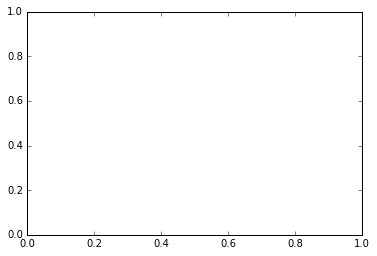

In [28]:
# Which of your friends like things that you like?

similar_friends = [ (friend, friend_like['name']) 
                     for friend, friend_likes in likes.items()
                       for friend_like in friend_likes
                         if friend_like.get('name') in common_likes ]


# Filter out any possible duplicates that could occur

ranked_friends = Counter([ friend for (friend, like) in list(set(similar_friends)) ])


pt = PrettyTable(field_names=["Friend", "Common Likes"])
pt.align["Friend"], pt.align["Common Likes"] = 'l', 'r'
[ pt.add_row(rf) 
  for rf in sorted(ranked_friends.items(), 
                   key=itemgetter(1), 
                   reverse=True) ]
print("My similar friends (ranked)")
print(pt)

# Also keep in mind that you have the full range of plotting
# capabilities available to you. A quick histogram that shows
# how many friends.

plt.hist(ranked_friends.values())
plt.xlabel('Bins (number of friends with shared likes)')
plt.ylabel('Number of shared likes in each bin')

# Keep in mind that you can customize the binning
# as desired. See http://matplotlib.org/api/pyplot_api.html

# For example...

plt.figure() # Display the previous plot
plt.hist(ranked_friends.values(),
          bins=arange(1,max(ranked_friends.values()),1))
plt.xlabel('Bins (number of friends with shared likes)')
plt.ylabel('Number of shared likes in each bin')
plt.figure() # Display the working plot

## Example 13. Constructing a graph of mutual friendships

In [29]:
import networkx as nx # pip install networkx
import requests # pip install requests

friends = [ (friend['id'], friend['name'],)
                for friend in g.get_connections('me', 'friends')['data'] ]

url = 'https://graph.facebook.com/me/mutualfriends/%s?access_token=%s'

mutual_friends = {} 

# This loop spawns a separate request for each iteration, so
# it may take a while. Optimization with a thread pool or similar
# technique would be possible.
for friend_id, friend_name in friends:
    r = requests.get(url % (friend_id, ACCESS_TOKEN,) )
    response_data = json.loads(r.content)['data']
    mutual_friends[friend_name] = [ data['name'] 
                                    for data in response_data ]
    
nxg = nx.Graph()

[ nxg.add_edge('me', mf) for mf in mutual_friends ]

[ nxg.add_edge(f1, f2) 
  for f1 in mutual_friends 
      for f2 in mutual_friends[f1] ]

# Explore what's possible to do with the graph by 
# typing nxg.<tab> or executing a new cell with 
# the following value in it to see some pydoc on nxg
print nxg

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-29-7814c48586ac>, line 31)

## Example 14. Finding and analyzing cliques in a graph of mutual friendships

In [30]:
# Finding cliques is a hard problem, so this could
# take a while for large graphs.
# See http://en.wikipedia.org/wiki/NP-complete and 
# http://en.wikipedia.org/wiki/Clique_problem.

cliques = [c for c in nx.find_cliques(nxg)]

num_cliques = len(cliques)

clique_sizes = [len(c) for c in cliques]
max_clique_size = max(clique_sizes)
avg_clique_size = sum(clique_sizes) / num_cliques

max_cliques = [c for c in cliques if len(c) == max_clique_size]

num_max_cliques = len(max_cliques)

max_clique_sets = [set(c) for c in max_cliques]
friends_in_all_max_cliques = list(reduce(lambda x, y: x.intersection(y),
                                  max_clique_sets))

print 'Num cliques:', num_cliques
print 'Avg clique size:', avg_clique_size
print 'Max clique size:', max_clique_size
print 'Num max cliques:', num_max_cliques
print
print 'Friends in all max cliques:'
print json.dumps(friends_in_all_max_cliques, indent=1)
print
print 'Max cliques:'
print json.dumps(max_cliques, indent=1)

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-30-7bd3fd806d50>, line 22)

## Example 15. Serializing a NetworkX graph to a file for consumption by D3

In [31]:
from networkx.readwrite import json_graph

nld = json_graph.node_link_data(nxg)

json.dump(nld, open('resources/ch02-facebook/viz/force.json','w'))

NameError: name 'nxg' is not defined

Note: You may need to implement some filtering on the NetworkX graph before writing it out to a file for display in D3, and for more than dozens of nodes, it may not be reasonable to render a meaningful visualization without some JavaScript hacking on its parameters. View the JavaScript source in [force.html](files/resources/ch02-facebook/viz/force.html) for some of the details.

## Example 16. Visualizing a mutual friendship graph with D3

In [ ]:
from IPython.display import IFrame
from IPython.core.display import display

# IPython Notebook can serve files and display them into
# inline frames. Prepend the path with the 'files' prefix.

viz_file = 'files/resources/ch02-facebook/viz/force.html'

display(IFrame(viz_file, '100%', '600px'))